In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('fake-news-detection')
jovian.set_colab_id('1C4Z5tBSkGf7ITSwgxop6n4lJan-r2ST3')

In [ ]:
project_name = 'fake-news-detection'

# Fake News Detection Using Deep Learning

1. In this notebook, we are going the detect weather the certain news is real or fake.

2. And we are using deep learning to do that and the language is TensorFlow.

3. This fake and real news dataset i take it from the kaggle and the link of the dataset is given below: -
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [ ]:
# Install some necessary libraries in the enviroment
!pip install opendatasets
!pip install jovian --upgrade --quiet

In [ ]:
# Import some necessary libraries
import jovian
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords 
import opendatasets as od
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, MaxPooling1D

import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#1. Downloading the dataset

Dataset is taken from the kaggle and link of the dataset already given.

In [ ]:
dataset_link = 'https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset'

od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: lakshaygola
Your Kaggle Key: ··········


 22%|██▏       | 9.00M/41.0M [00:00<00:00, 50.5MB/s]

100%|██████████| 41.0M/41.0M [00:00<00:00, 122MB/s] 


#2. Reading the news dataset
Loading the fake news and the real new dataset we will combine them to get the final dataset

With that we try to get some insight of both the dataset which can help us to solve the problem.

In [ ]:
# Reading the fake news dataset
fakeNews = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')

# Reading the real news
realNews = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')

In [ ]:
# Adding the label column in the dataset
#  0 - Fake news  1 - Real News
fakeNews['label'] = 0
realNews['label'] = 1

fakeNews.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
realNews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
print(fakeNews.info())
print(realNews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
None


In [ ]:
# Concatinate the dataset
newsdf = pd.concat([realNews, fakeNews])

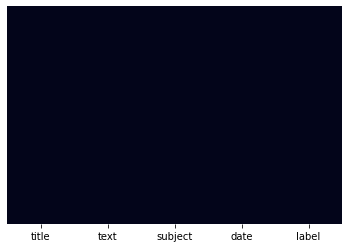

In [ ]:
sns.heatmap(newsdf.isnull(), yticklabels= False, cbar = False)

In [ ]:
newsdf = newsdf.sample(frac=1)
newsdf.reset_index(inplace= True)

In [ ]:
newsdf.head()

,index,title,text,subject,date,label
0,17390,Spanish government says Catalan response not v...,MADRID (Reuters) - The response from Catalonia...,worldnews,"October 16, 2017",1
1,11293,TWO PICTURES Perfectly Illustrate The Differen...,This picture is representative of the violence...,politics,"Mar 26, 2017",0
2,17662,TRUMP REPORTEDLY Thinking About Replacing Jeff...,"Hillary Clinton, Barack Obama, Eric Holder and...",left-news,"Nov 11, 2017",0
3,17316,VETERANS CAN’T GET HEALTH CARE…But These MN So...,Our State Department brought in over 1 million...,Government News,"May 22, 2015",0
4,13367,ATTENTION BAD GUYS With Weapons: There Are NO ...,Just a little dose of common sense Guns save l...,politics,"Aug 1, 2016",0


In [ ]:
# Droping the index columns from the dataset 
newsdf.drop('index', axis = 1, inplace = True)

#3. Data Visualization

Let's explore the dataset and get some insight from the dataset

In [ ]:
Stopwords = set(STOPWORDS)

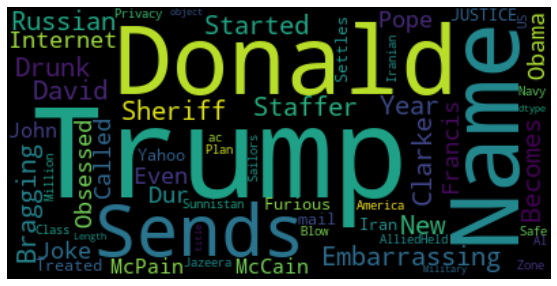

In [ ]:
# Let's see which word is used more frequently for the fake news
fig ,ax = plt.subplots(figsize= (15,5))
wcFake = WordCloud(background_color='black',
                   max_words = 200, 
                   stopwords = Stopwords)
wcFake.generate(str(fakeNews['title']))
plt.imshow(wcFake, interpolation = 'bilinear')
plt.axis('off')
plt.show()

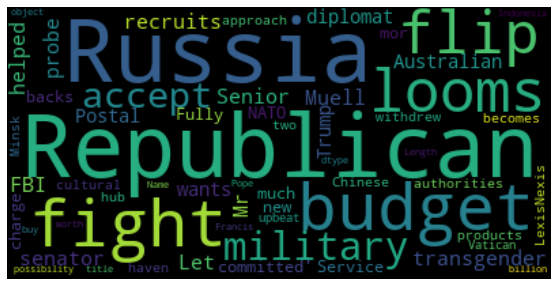

In [ ]:
# Lets see the word which is more frequently used in the real news
fig ,ax = plt.subplots(figsize= (15,5))
wcReal = WordCloud(background_color='black',
                   max_words = 200, 
                   stopwords = Stopwords)
wcReal.generate(str(realNews['title']))
plt.imshow(wcReal, interpolation = 'bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


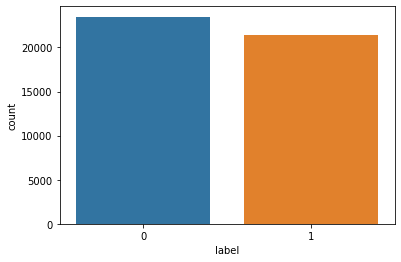

In [ ]:
# Counting the fake and the real news
sns.countplot(newsdf['label'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


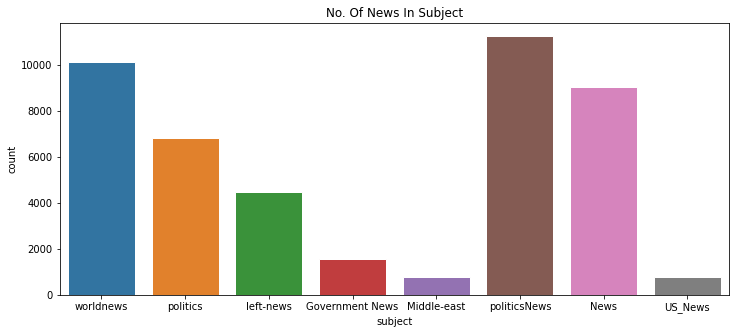

In [ ]:
# Subject relative data analysis
fig , ax = plt.subplots(figsize = (12,5))
sns.set_style('darkgrid')
g = sns.countplot(newsdf['subject'])
g.set_title('No. Of News In Subject')
plt.show()

#4. Preprocessing

Doing some preprocessing on the title column of the dataset beacause this columns can help us to predict the fake and real news

In [ ]:
# Creating the independent and dependent variable 
y = newsdf['label']
x = newsdf.drop('label', axis = 1)

In [ ]:
news = x.copy()
news['title'][0]

'Spanish government says Catalan response not valid: media'

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# PreProcessing on the training data
ps = PorterStemmer()
corpus = []
for i in range(len(news)):
  # Substituting all the charater other than alphabets with white spaces
  sentences = re.sub('[^a-zA-Z]', ' ', news['title'][i])

  # Convert the sentences into word to apply stemming on it
  sentences2Word = sentences.lower().split()

  # Appling Stemming
  reviewText = [ps.stem(word) for word in sentences2Word if word not in stopwords.words('english')]
  finalSentence = ' '.join(reviewText) 
  
  corpus.append(finalSentence)

corpus[:5]

['spanish govern say catalan respons valid media',
 'two pictur perfectli illustr differ obama lawless america trump law order america',
 'trump reportedli think replac jeff session candid cower pressur swamp',
 'veteran get health care mn somali muslim got us taxpay dollar colleg use jihad',
 'attent bad guy weapon sit duck colleg state']

#5. Splitting the dataset

Now we are splitting the dataset so that we can provide that into our model

x - Independent variable 

y- Dependent variable (Target Variable)


In [ ]:
vocal_size = 10000  # HyperParameter

# One hot encoding
oneHotRepr = [one_hot(sens, vocal_size) for sens in corpus]
oneHotRepr[:5]

[[858, 7435, 2744, 6086, 7009, 1371, 3145],
 [7955, 8119, 7792, 6060, 6756, 1474, 6962, 1150, 8712, 2072, 1546, 1150],
 [8712, 6423, 8049, 5477, 8332, 2994, 4835, 4480, 2845, 4074],
 [8340,
  8672,
  6338,
  2779,
  1951,
  4928,
  4727,
  4597,
  2260,
  4295,
  9307,
  6110,
  8271,
  9962],
 [943, 6023, 7323, 8398, 4827, 6104, 6110, 5207]]

# Word Embedding

In [ ]:
# Finding the maximum length of the sentence in the dataset
length = max([len(sens) for sens in x])
length += 1
print('Length for the padding: ', length)

# Applying the pad sequence
textData = pad_sequences(oneHotRepr, maxlen = length)
textData[:5]

Length for the padding:  8


array([[   0,  858, 7435, 2744, 6086, 7009, 1371, 3145],
       [6756, 1474, 6962, 1150, 8712, 2072, 1546, 1150],
       [8049, 5477, 8332, 2994, 4835, 4480, 2845, 4074],
       [4727, 4597, 2260, 4295, 9307, 6110, 8271, 9962],
       [ 943, 6023, 7323, 8398, 4827, 6104, 6110, 5207]], dtype=int32)

#6. Building Model

In [ ]:
feat_dim = 20   # Hyperparameter
model = Sequential()
model.add(Embedding(vocal_size, feat_dim, input_length= length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 20)             200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               48400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 248,501
Trainable params: 248,501
Non-trainable params: 0
_________________________________________________________________


#7. Model Training

In [ ]:
x= np.array(textData)
x.shape

(44898, 8)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=80)

In [ ]:
history = []
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 10, verbose= 2, batch_size = 95)

Epoch 1/10
331/331 - 7s - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.4496 - val_accuracy: 0.9156
Epoch 2/10
331/331 - 7s - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.4680 - val_accuracy: 0.9161
Epoch 3/10
331/331 - 7s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.4855 - val_accuracy: 0.9133
Epoch 4/10
331/331 - 7s - loss: 0.0155 - accuracy: 0.9942 - val_loss: 0.5798 - val_accuracy: 0.9134
Epoch 5/10
331/331 - 7s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.5749 - val_accuracy: 0.9146
Epoch 6/10
331/331 - 7s - loss: 0.0088 - accuracy: 0.9966 - val_loss: 0.6373 - val_accuracy: 0.9110
Epoch 7/10
331/331 - 7s - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.6166 - val_accuracy: 0.9128
Epoch 8/10
331/331 - 7s - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.7000 - val_accuracy: 0.9124
Epoch 9/10
331/331 - 7s - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.7183 - val_accuracy: 0.9136
Epoch 10/10
331/331 - 7s - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.6757 - val_accuracy: 0.9119

#8. Evaluating The Model

In [ ]:
# Taking the Prediction for the test dataset
ypred = model.predict_classes(xtest)
ypred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [ ]:
# Comparing the First 5 Rows of the test dataset
ytest[:5]

8863     0
27321    0
40800    1
16176    0
14003    0
Name: label, dtype: int64

In [ ]:
# Let's crete the confusion Martix 
martix = confusion_matrix(ytest, ypred)
print('Confusion Matrix: \n' , martix)

# Classification Report
report = classification_report(ytest, ypred)
print('Classification Report: \n', report)

Confusion Matrix: 
 [[6423  638]
 [ 469 5940]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7061
           1       0.90      0.93      0.91      6409

    accuracy                           0.92     13470
   macro avg       0.92      0.92      0.92     13470
weighted avg       0.92      0.92      0.92     13470



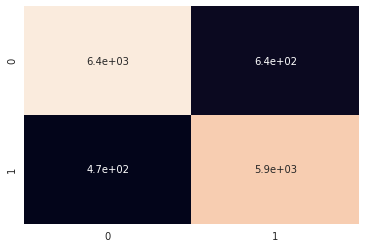

In [ ]:
sns.heatmap(martix, cbar= False, annot= True)

TypeError: ignored

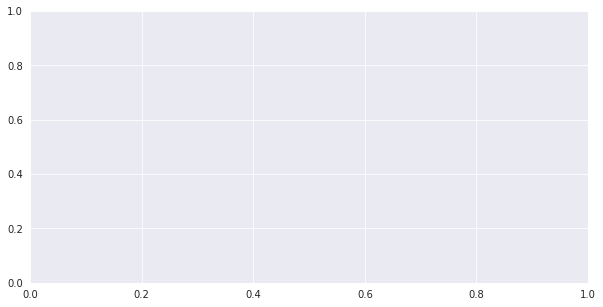

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
accuracies = [x['accuracy'] for x in history]
val_accuraies = [x['val_accuracy'] for x in history]
plt.plot(accuracies)

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: